# Bank Customer Churn Analysis - EDA

This notebook contains the exploratory data analysis for the bank customer churn prediction project.

In [19]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set_theme(style="whitegrid")  # Usando o tema do seaborn diretamente
%matplotlib inline

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load the dataset
df = pd.read_csv('../Bank Customer Churn Prediction.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()




Dataset Shape: (10000, 12)

First 5 rows:


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
# Detailed dataset analysis
print("=== Dataset General Information ===")
print("\nDataset Dimensions:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMemory and Types Information:")
df.info()

=== Dataset General Information ===

Dataset Dimensions: (10000, 12)

Data Types:
customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

Memory and Types Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   p

In [21]:
# Missing values analysis
print("=== Missing Values Analysis ===")
missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_pct
})
print(missing_df[missing_df['Missing Values'] > 0] if missing_df['Missing Values'].sum() > 0 else "No missing values found")

# Check for duplicates
print("\n=== Duplicates Analysis ===")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

=== Missing Values Analysis ===
No missing values found

=== Duplicates Analysis ===
Number of duplicate rows: 0


=== Target Variable (Churn) Analysis ===

Churn Distribution:
       Count  Percentage (%)
churn                       
0       7963           79.63
1       2037           20.37


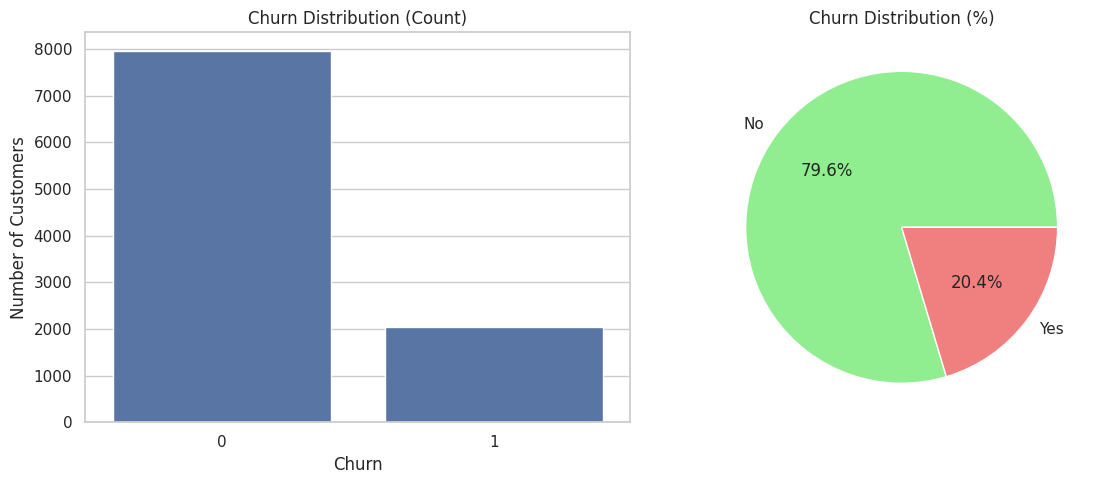

In [22]:
# Churn distribution analysis
print("=== Target Variable (Churn) Analysis ===")
churn_dist = df['churn'].value_counts()
churn_pct = df['churn'].value_counts(normalize=True) * 100

# Create DataFrame with statistics
churn_stats = pd.DataFrame({
    'Count': churn_dist,
    'Percentage (%)': churn_pct
})
print("\nChurn Distribution:")
print(churn_stats)

# Churn distribution visualization
plt.figure(figsize=(12, 5))

# Bar plot
plt.subplot(1, 2, 1)
sns.barplot(x=churn_stats.index, y='Count', data=churn_stats)
plt.title('Churn Distribution (Count)')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(churn_stats['Percentage (%)'], labels=['No', 'Yes'], autopct='%1.1f%%', 
        colors=['lightgreen', 'lightcoral'])
plt.title('Churn Distribution (%)')

plt.tight_layout()
plt.show()

Statistical analysis of numerical variables

In [23]:
# Statistical analysis of numerical variables
print("=== Numerical Variables Analysis ===")
print("\nSummary Statistics:")
df.describe()

=== Numerical Variables Analysis ===

Summary Statistics:


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


Analysis of categorical variables

In [24]:
# Analysis of categorical variables
print("=== Categorical Variables Analysis ===")
categorical_columns = ['country', 'gender', 'credit_card', 'active_member', 'churn']

for col in categorical_columns:
    print(f"\n{col.title()} Distribution:")
    print(df[col].value_counts())
    print(f"Percentage:\n{df[col].value_counts(normalize=True) * 100}")

=== Categorical Variables Analysis ===

Country Distribution:
country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Percentage:
country
France    50.14
Germany   25.09
Spain     24.77
Name: proportion, dtype: float64

Gender Distribution:
gender
Male      5457
Female    4543
Name: count, dtype: int64
Percentage:
gender
Male     54.57
Female   45.43
Name: proportion, dtype: float64

Credit_Card Distribution:
credit_card
1    7055
0    2945
Name: count, dtype: int64
Percentage:
credit_card
1   70.55
0   29.45
Name: proportion, dtype: float64

Active_Member Distribution:
active_member
1    5151
0    4849
Name: count, dtype: int64
Percentage:
active_member
1   51.51
0   48.49
Name: proportion, dtype: float64

Churn Distribution:
churn
0    7963
1    2037
Name: count, dtype: int64
Percentage:
churn
0   79.63
1   20.37
Name: proportion, dtype: float64


Visualization of distributions of numerical variables

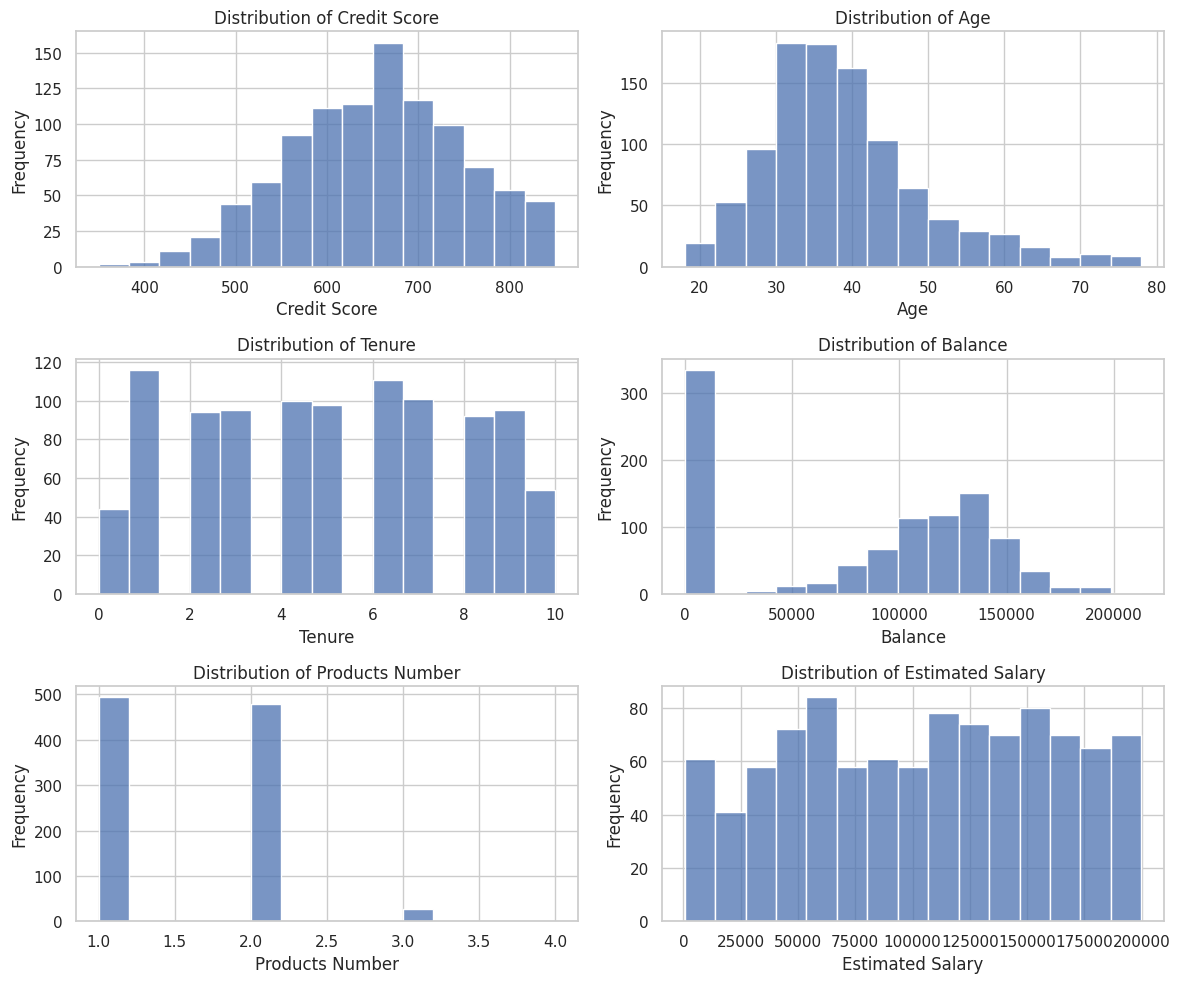

In [25]:
# Visualize distributions of numerical variables
numerical_columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Create a figure with subplots - com tamanho reduzido
plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(3, 2, i+1)
    # Usar uma amostra menor dos dados e reduzir o número de bins
    sample_size = min(len(df), 1000)  # Limita a 1000 pontos
    sns.histplot(df[col].sample(sample_size), kde=False, bins=15)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Visualization of categorical variables

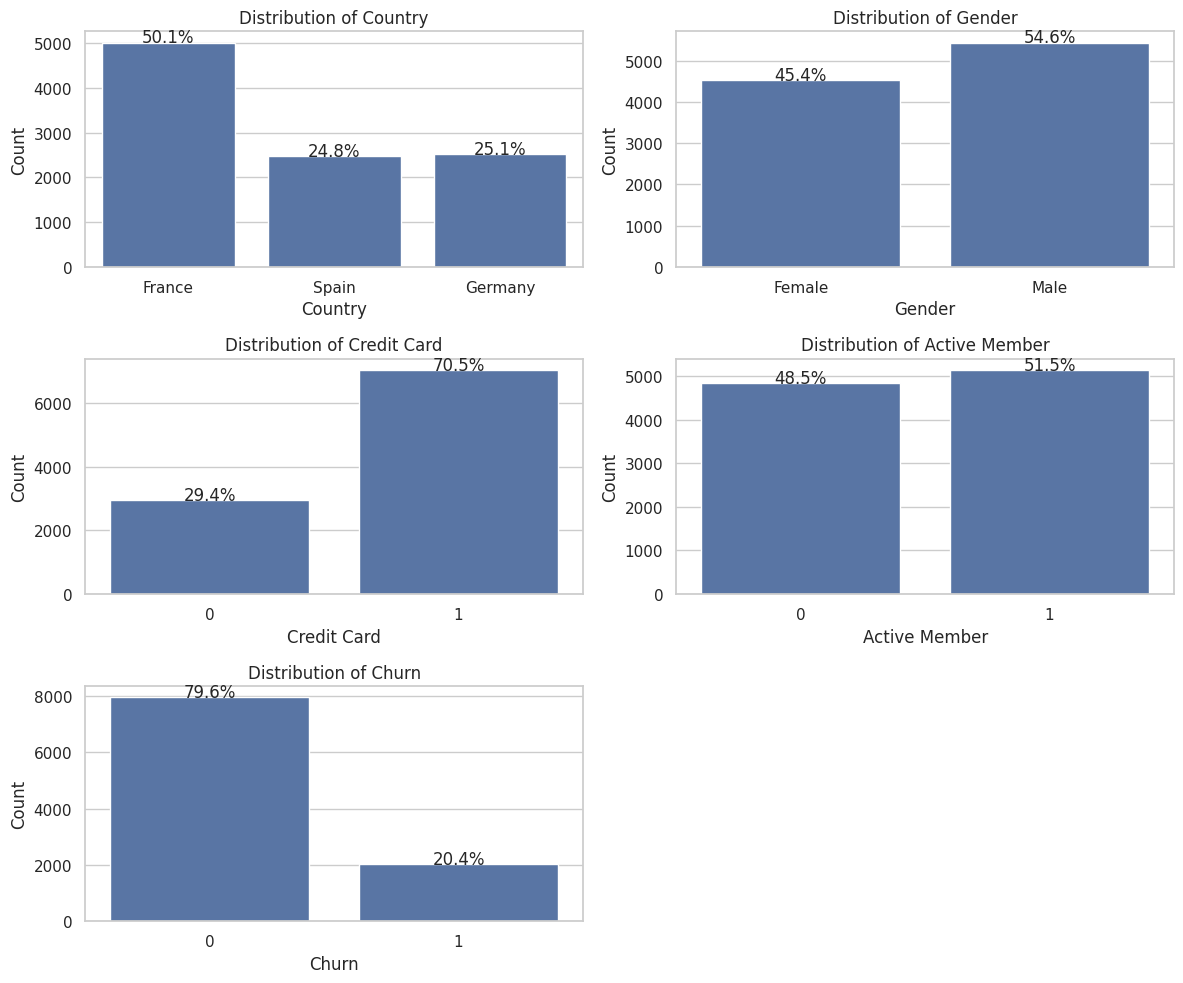

In [26]:
# Visualization of categorical variables
plt.figure(figsize=(12, 10))

for i, col in enumerate(categorical_columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Count')
    
    # Add percentage labels
    total = float(len(df))
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(100 * height/total),
                ha="center") 

plt.tight_layout()
plt.show()

Relationship between categorical variables and churn

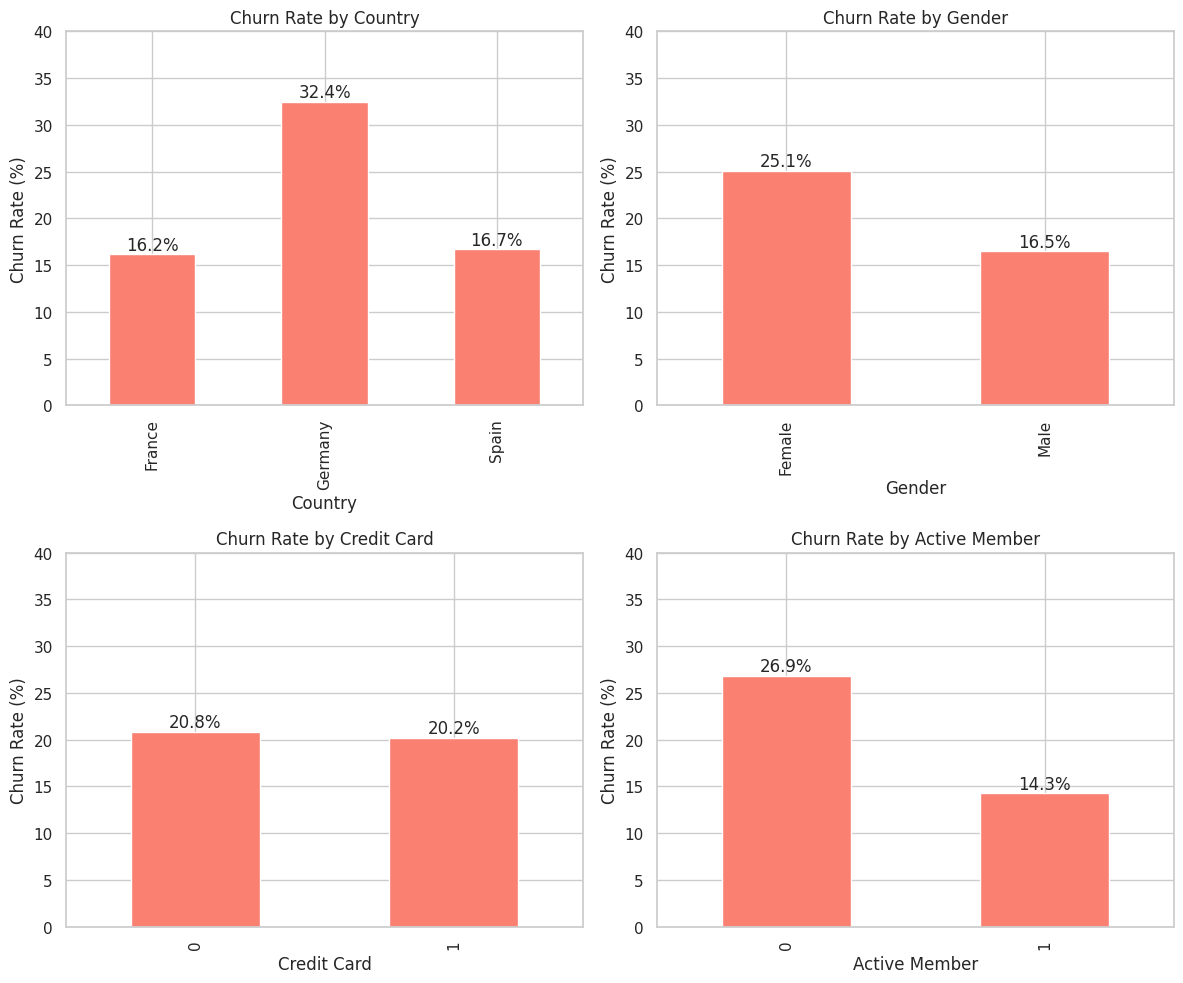

In [27]:
# Relationship between categorical variables and churn
categorical_predictors = ['country', 'gender', 'credit_card', 'active_member']

plt.figure(figsize=(12, 10))

for i, col in enumerate(categorical_predictors):
    plt.subplot(2, 2, i+1)
    
    # Create a crosstab to calculate churn rate by category
    ct = pd.crosstab(df[col], df['churn'])
    churn_rate = ct[1] / (ct[0] + ct[1]) * 100
    
    # Plot churn rate by category
    churn_rate.plot(kind='bar', color='salmon')
    plt.title(f'Churn Rate by {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Churn Rate (%)')
    plt.ylim(0, 40)  # Setting y-axis limit for better comparison
    
    # Add percentage labels
    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width()/2.,
                p.get_height() + 0.5,
                '{:1.1f}%'.format(p.get_height()),
                ha="center")

plt.tight_layout()
plt.show()

Relationship between numerical variables and churn

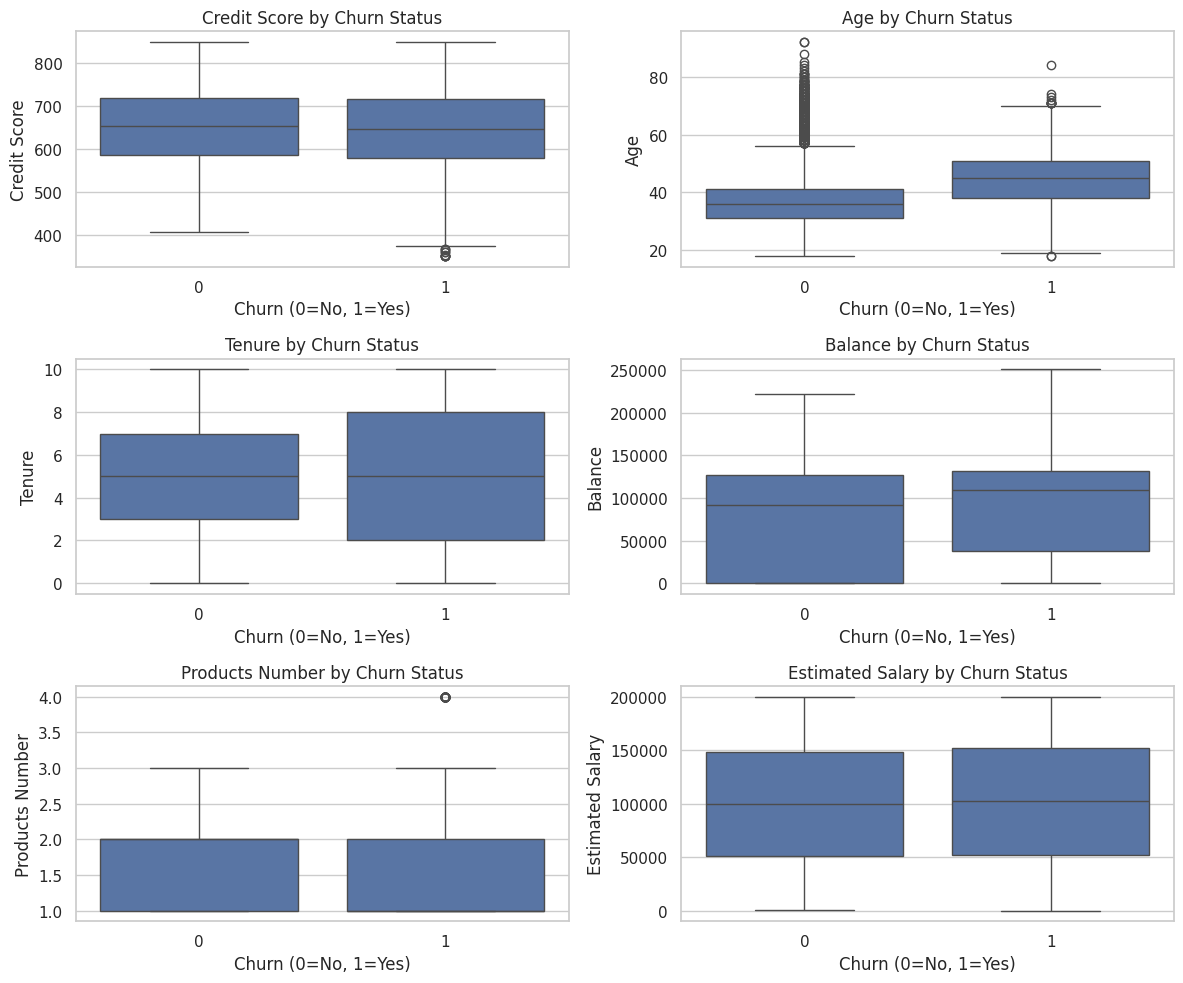

In [28]:
# Relationship between numerical variables and churn
numerical_predictors = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_predictors):
    plt.subplot(3, 2, i+1)
    
    # Create boxplot for each numerical variable by churn status
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f'{col.replace("_", " ").title()} by Churn Status')
    plt.xlabel('Churn (0=No, 1=Yes)')
    plt.ylabel(col.replace("_", " ").title())

plt.tight_layout()
plt.show()

Visualizing distributions of numerical variables by churn status

/tmp/ipykernel_196563/380323835.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='churn', y=col, data=df, palette=['lightgreen', 'lightcoral'])
/tmp/ipykernel_196563/380323835.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='churn', y=col, data=df, palette=['lightgreen', 'lightcoral'])
/tmp/ipykernel_196563/380323835.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='churn', y=col, data=df, palette=['lightgreen', 'lightcoral'])
/tmp/ipykernel_196563/380323835.py:8: FutureWarning: 

Passing `palette` without assigning 

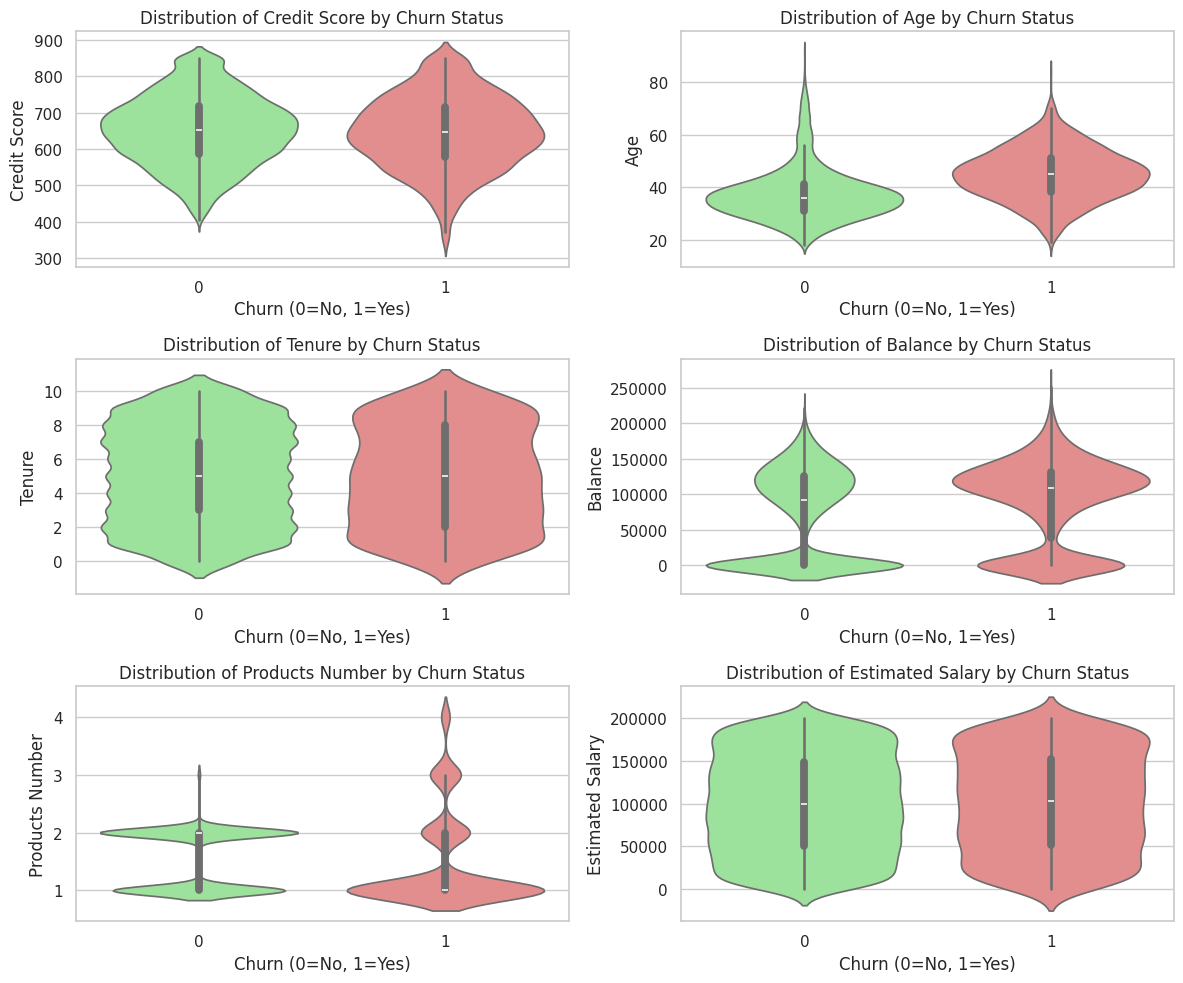

In [29]:
# Distribution of numerical variables by churn status using violin plots
plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_predictors):
    plt.subplot(3, 2, i+1)
    
    # Create violin plot for each numerical variable by churn status
    sns.violinplot(x='churn', y=col, data=df, palette=['lightgreen', 'lightcoral'])
    plt.title(f'Distribution of {col.replace("_", " ").title()} by Churn Status')
    plt.xlabel('Churn (0=No, 1=Yes)')
    plt.ylabel(col.replace("_", " ").title())

plt.tight_layout()
plt.show()

Statistical analysis of variables by churn status

In [30]:
# Statistical analysis of numerical variables by churn status
print("=== Statistical Analysis by Churn Status ===")
print("\nChurn = 0 (Stayed):")
print(df[df['churn'] == 0][numerical_predictors].describe())
print("\nChurn = 1 (Left):")
print(df[df['churn'] == 1][numerical_predictors].describe())

=== Statistical Analysis by Churn Status ===

Churn = 0 (Stayed):
       credit_score     age  tenure   balance  products_number  \
count       7963.00 7963.00 7963.00   7963.00          7963.00   
mean         651.85   37.41    5.03  72745.30             1.54   
std           95.65   10.13    2.88  62848.04             0.51   
min          405.00   18.00    0.00      0.00             1.00   
25%          585.00   31.00    3.00      0.00             1.00   
50%          653.00   36.00    5.00  92072.68             2.00   
75%          718.00   41.00    7.00 126410.28             2.00   
max          850.00   92.00   10.00 221532.80             3.00   

       estimated_salary  
count           7963.00  
mean           99738.39  
std            57405.59  
min               90.07  
25%            50783.49  
50%            99645.04  
75%           148609.96  
max           199992.48  

Churn = 1 (Left):
       credit_score     age  tenure   balance  products_number  \
count       2037.00 

T-tests to compare means between churners and non-churners

In [31]:
# T-tests to compare means between churners and non-churners
from scipy import stats

print("=== T-Tests for Numerical Variables by Churn Status ===")
print("Testing if the means are significantly different between customers who left and stayed.")
print("H0: Means are equal; H1: Means are different")
print("p-value < 0.05 indicates statistically significant difference.\n")

for col in numerical_predictors:
    churned = df[df['churn'] == 1][col]
    stayed = df[df['churn'] == 0][col]
    t_stat, p_value = stats.ttest_ind(churned, stayed, equal_var=False)
    
    print(f"{col.replace('_', ' ').title()}:")
    print(f"Mean for Churned Customers: {churned.mean():.2f}")
    print(f"Mean for Retained Customers: {stayed.mean():.2f}")
    print(f"Difference: {churned.mean() - stayed.mean():.2f}")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Conclusion: Statistically significant difference.\n")
    else:
        print("Conclusion: No statistically significant difference.\n")

=== T-Tests for Numerical Variables by Churn Status ===
Testing if the means are significantly different between customers who left and stayed.
H0: Means are equal; H1: Means are different
p-value < 0.05 indicates statistically significant difference.

Credit Score:
Mean for Churned Customers: 645.35
Mean for Retained Customers: 651.85
Difference: -6.50
t-statistic: -2.6347
p-value: 0.0085
Conclusion: Statistically significant difference.

Age:
Mean for Churned Customers: 44.84
Mean for Retained Customers: 37.41
Difference: 7.43
t-statistic: 30.4192
p-value: 0.0000
Conclusion: Statistically significant difference.

Tenure:
Mean for Churned Customers: 4.93
Mean for Retained Customers: 5.03
Difference: -0.10
t-statistic: -1.3843
p-value: 0.1664
Conclusion: No statistically significant difference.

Balance:
Mean for Churned Customers: 91108.54
Mean for Retained Customers: 72745.30
Difference: 18363.24
t-statistic: 12.4713
p-value: 0.0000
Conclusion: Statistically significant difference.



Chi-square tests for categorical variables

In [32]:
# Chi-Square Tests for categorical variables
from scipy.stats import chi2_contingency

print("=== Chi-Square Tests for Categorical Variables ===")
print("Testing if there's an association between categorical variables and churn.")
print("H0: No association; H1: There is an association")
print("p-value < 0.05 indicates statistically significant association.\n")

for col in categorical_predictors:
    contingency_table = pd.crosstab(df[col], df['churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"{col.replace('_', ' ').title()}:")
    print(contingency_table)
    print(f"Chi-square value: {chi2:.4f}")
    print(f"p-value: {p:.4f}")
    if p < 0.05:
        print("Conclusion: There is a significant association.\n")
    else:
        print("Conclusion: No significant association.\n")

=== Chi-Square Tests for Categorical Variables ===
Testing if there's an association between categorical variables and churn.
H0: No association; H1: There is an association
p-value < 0.05 indicates statistically significant association.

Country:
churn       0    1
country           
France   4204  810
Germany  1695  814
Spain    2064  413
Chi-square value: 301.2553
p-value: 0.0000
Conclusion: There is a significant association.

Gender:
churn      0     1
gender            
Female  3404  1139
Male    4559   898
Chi-square value: 112.9186
p-value: 0.0000
Conclusion: There is a significant association.

Credit Card:
churn           0     1
credit_card            
0            2332   613
1            5631  1424
Chi-square value: 0.4713
p-value: 0.4924
Conclusion: No significant association.

Active Member:
churn             0     1
active_member            
0              3547  1302
1              4416   735
Chi-square value: 242.9853
p-value: 0.0000
Conclusion: There is a significant a

## Advanced Correlation Analysis

We will analyze the correlations between variables to identify patterns and potential predictors of churn.

Correlation Matrix

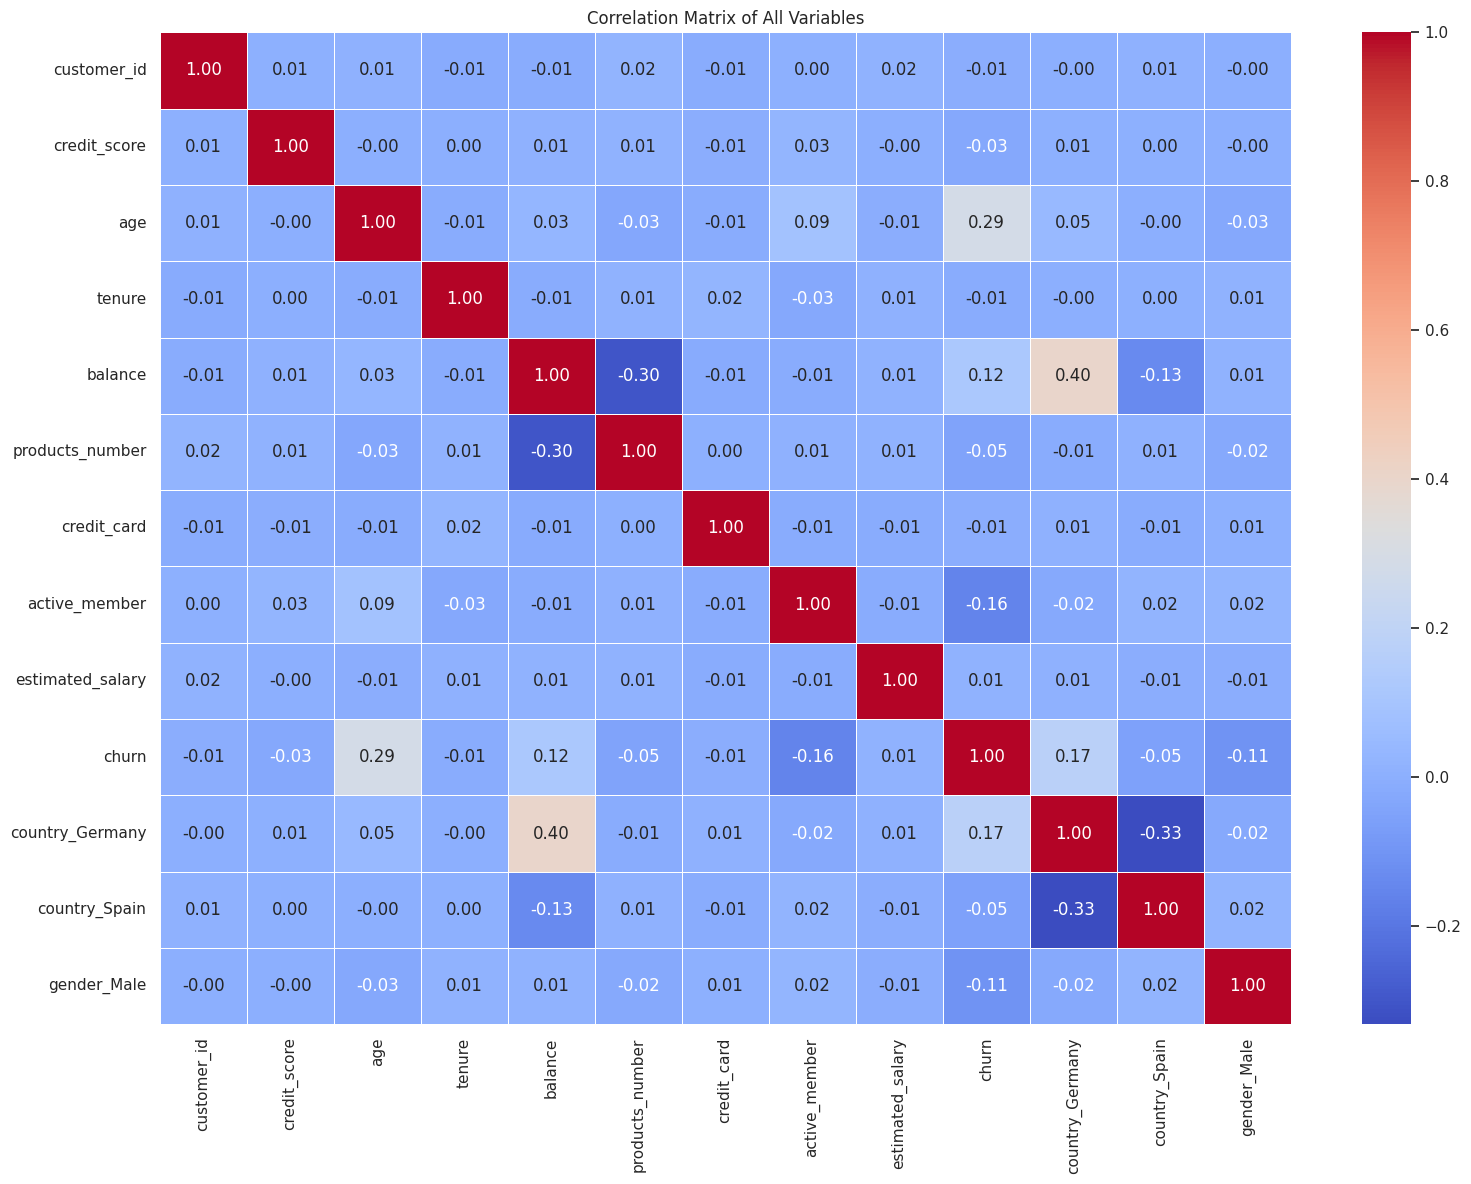

In [33]:
# Convert categorical variables to numeric for correlation analysis
df_corr = df.copy()
# One-hot encode categorical variables
df_corr = pd.get_dummies(df_corr, columns=['country', 'gender'], drop_first=True)

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of All Variables')
plt.tight_layout()
plt.show()

Correlation with churn

=== Variables Correlation with Churn ===

churn               1.00
age                 0.29
country_Germany     0.17
balance             0.12
estimated_salary    0.01
customer_id        -0.01
credit_card        -0.01
tenure             -0.01
credit_score       -0.03
products_number    -0.05
country_Spain      -0.05
gender_Male        -0.11
active_member      -0.16
Name: churn, dtype: float64


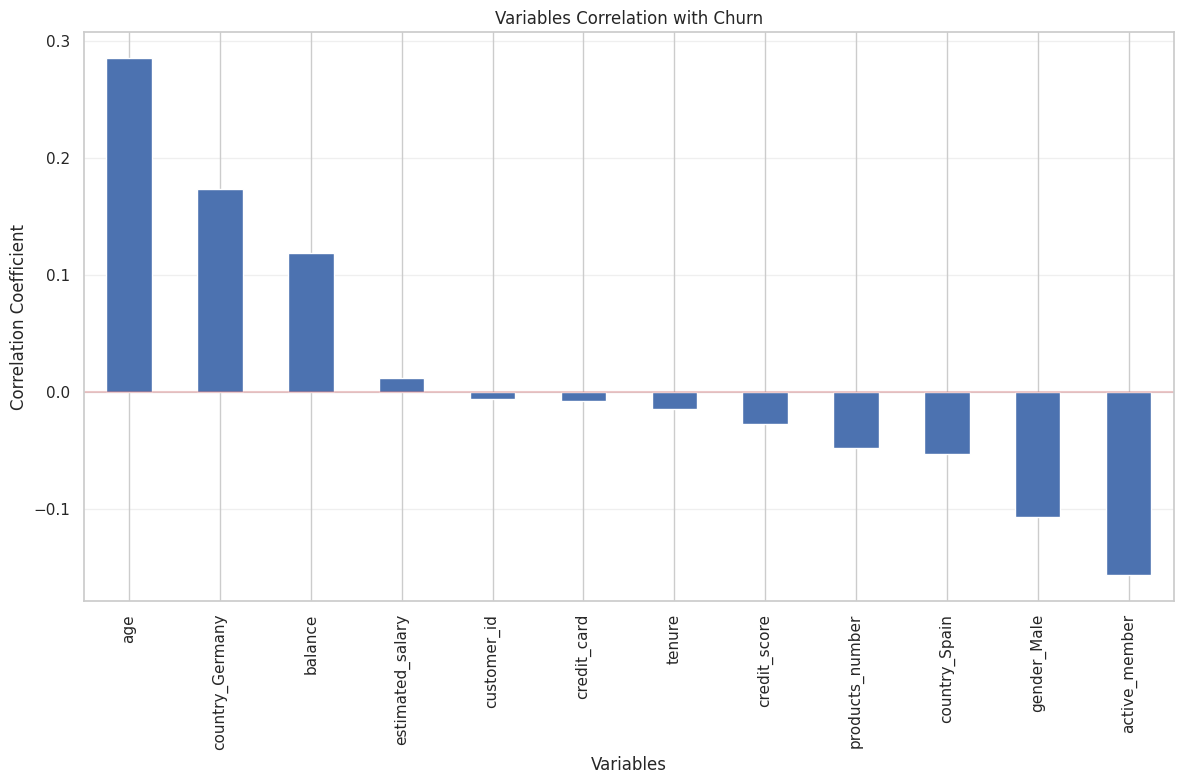

In [34]:
# Correlation with Churn
churn_corr = corr_matrix['churn'].sort_values(ascending=False)
print("=== Variables Correlation with Churn ===\n")
print(churn_corr)

# Visualize correlation with churn
plt.figure(figsize=(12, 8))
churn_corr[churn_corr.index != 'churn'].plot(kind='bar')
plt.title('Variables Correlation with Churn')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Customer Segmentation

Let’s analyze how churn rate varies across different customer segments.

/tmp/ipykernel_196563/1421334506.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age = df.groupby('age_group')['churn'].mean() * 100
/tmp/ipykernel_196563/1421334506.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_credit = df.groupby('credit_score_group')['churn'].mean() * 100
/tmp/ipykernel_196563/1421334506.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_balance = df.groupby('b

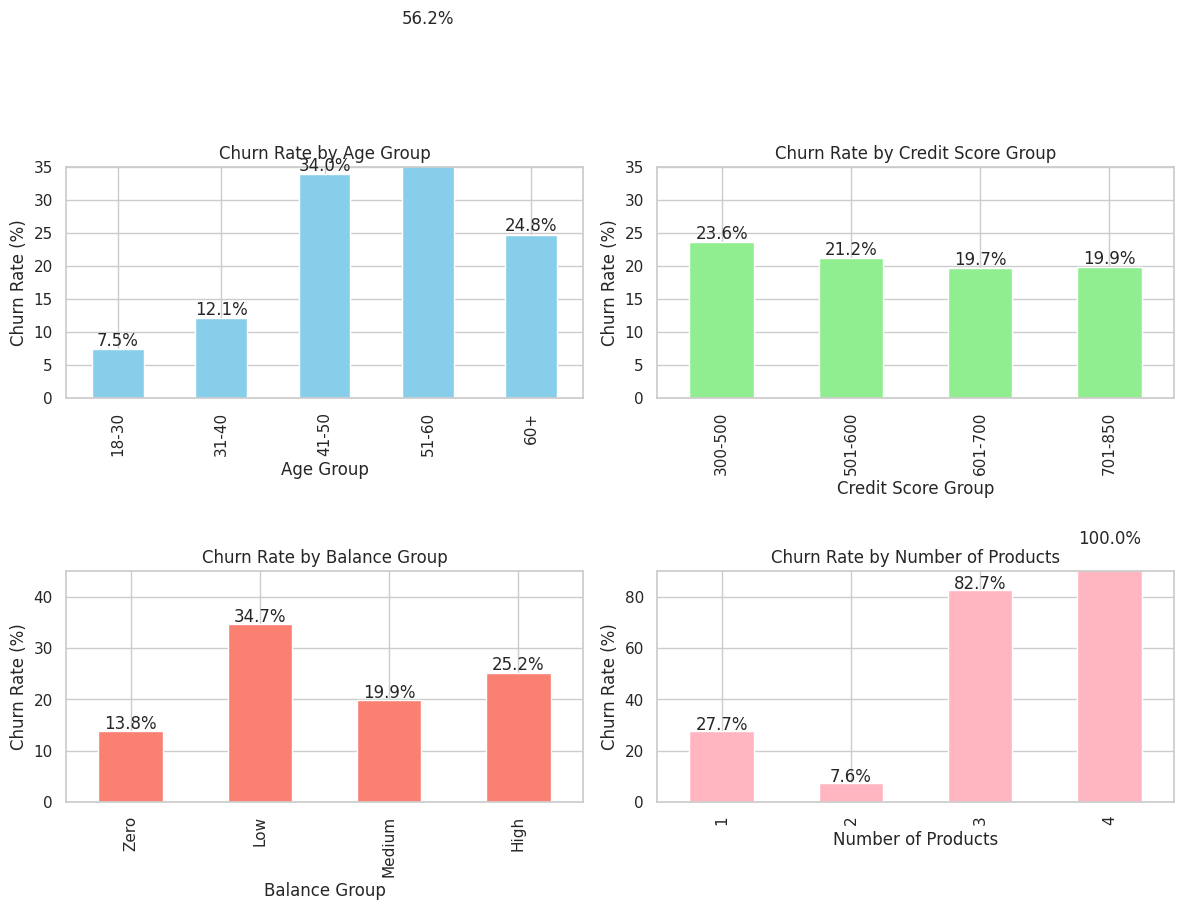

In [37]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], 
                         labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Create credit score groups
df['credit_score_group'] = pd.cut(df['credit_score'], bins=[300, 500, 600, 700, 850], 
                                  labels=['300-500', '501-600', '601-700', '701-850'])

# Create balance groups
df['balance_group'] = pd.cut(df['balance'], bins=[-1, 0, 50000, 100000, 250000], 
                             labels=['Zero', 'Low', 'Medium', 'High'])

# Visualize churn rate by age groups
plt.figure(figsize=(12, 10))

# Age Groups
plt.subplot(2, 2, 1)
churn_by_age = df.groupby('age_group')['churn'].mean() * 100
churn_by_age.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 35)
for i, v in enumerate(churn_by_age):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

# Credit Score Groups
plt.subplot(2, 2, 2)
churn_by_credit = df.groupby('credit_score_group')['churn'].mean() * 100
churn_by_credit.plot(kind='bar', color='lightgreen')
plt.title('Churn Rate by Credit Score Group')
plt.xlabel('Credit Score Group')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 35)
for i, v in enumerate(churn_by_credit):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

# Balance Groups
plt.subplot(2, 2, 3)
churn_by_balance = df.groupby('balance_group')['churn'].mean() * 100
churn_by_balance.plot(kind='bar', color='salmon')
plt.title('Churn Rate by Balance Group')
plt.xlabel('Balance Group')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 45)
for i, v in enumerate(churn_by_balance):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

# Products Number
plt.subplot(2, 2, 4)
churn_by_products = df.groupby('products_number')['churn'].mean() * 100
churn_by_products.plot(kind='bar', color='lightpink')
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 90)
for i, v in enumerate(churn_by_products):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

Cross-customer segmentation

/tmp/ipykernel_196563/12610774.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_balance_churn = df.groupby(['age_group', 'balance_group'])['churn'].mean().unstack() * 100


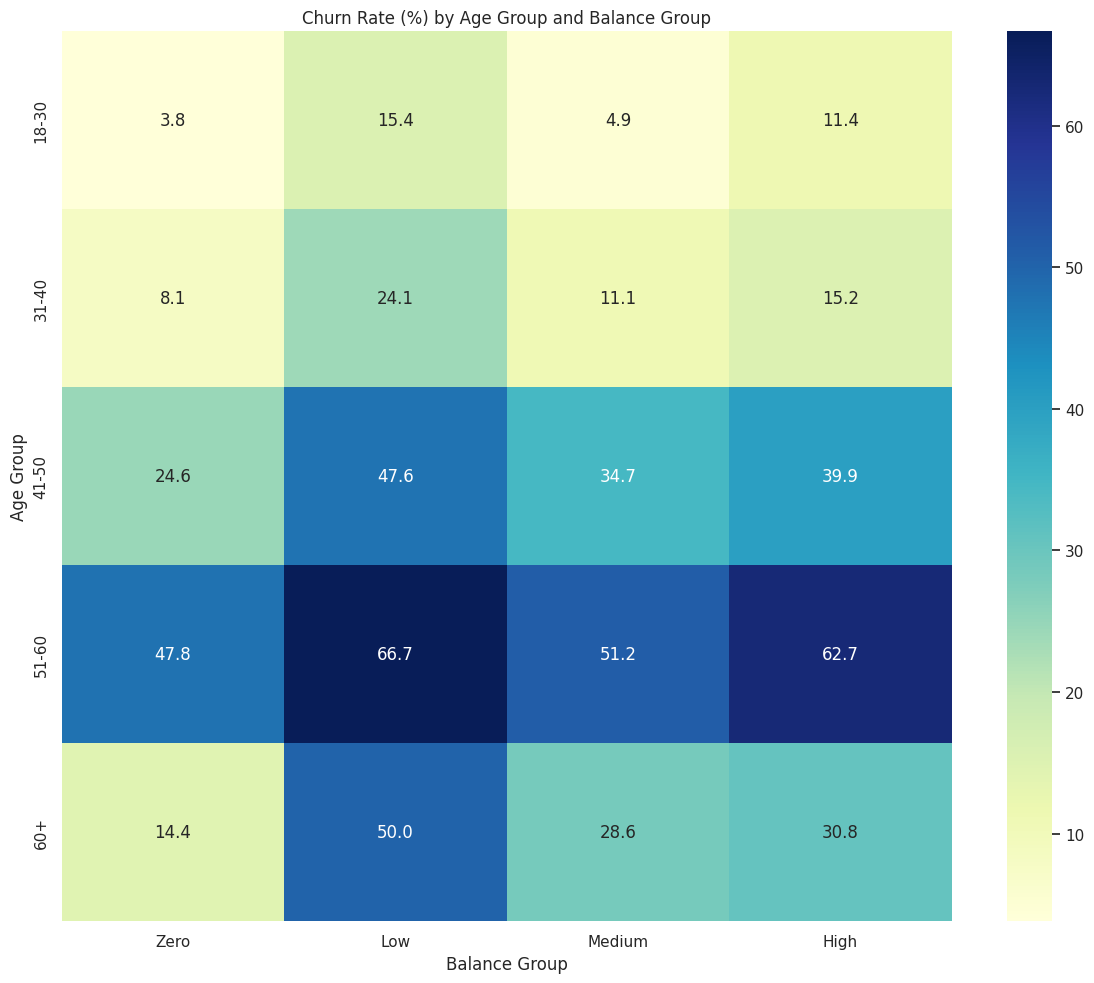

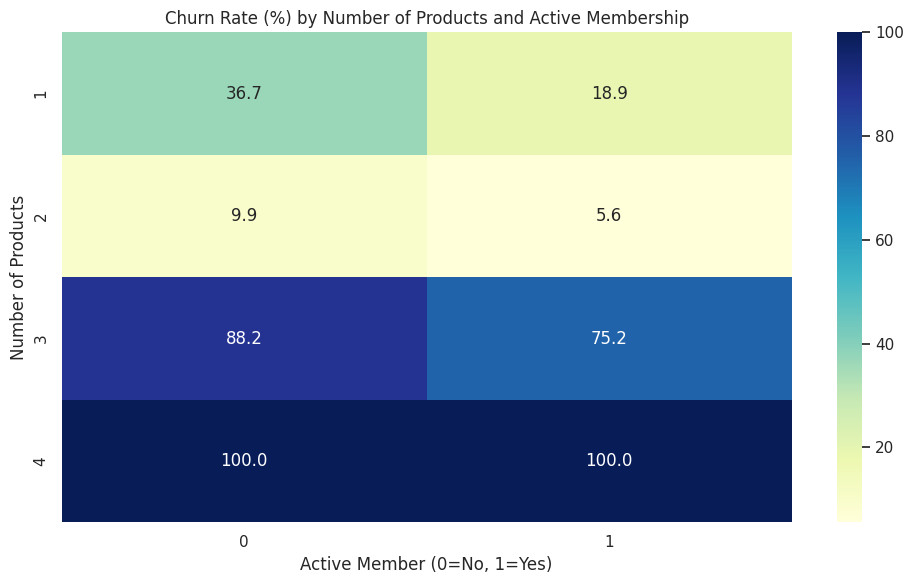

In [38]:
# Cross-segmentation: analyze churn rate by combinations of segments
# This can help identify specific customer profiles with high churn rates

# Age Group and Balance Group
age_balance_churn = df.groupby(['age_group', 'balance_group'])['churn'].mean().unstack() * 100

plt.figure(figsize=(12, 10))
sns.heatmap(age_balance_churn, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Churn Rate (%) by Age Group and Balance Group')
plt.xlabel('Balance Group')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

# Products and Active Membership
products_active_churn = df.groupby(['products_number', 'active_member'])['churn'].mean().unstack() * 100

plt.figure(figsize=(10, 6))
sns.heatmap(products_active_churn, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Churn Rate (%) by Number of Products and Active Membership')
plt.xlabel('Active Member (0=No, 1=Yes)')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

##  Preliminary Feature Engineering

Let's create some new variables that can be predictive of churn.

Preliminary Feature Engineering

=== Correlation of New Features with Churn ===

balance_to_income_ratio    0.03
balance_per_product        0.11
products_per_decade       -0.19
engagement_score          -0.12
Name: churn, dtype: float64


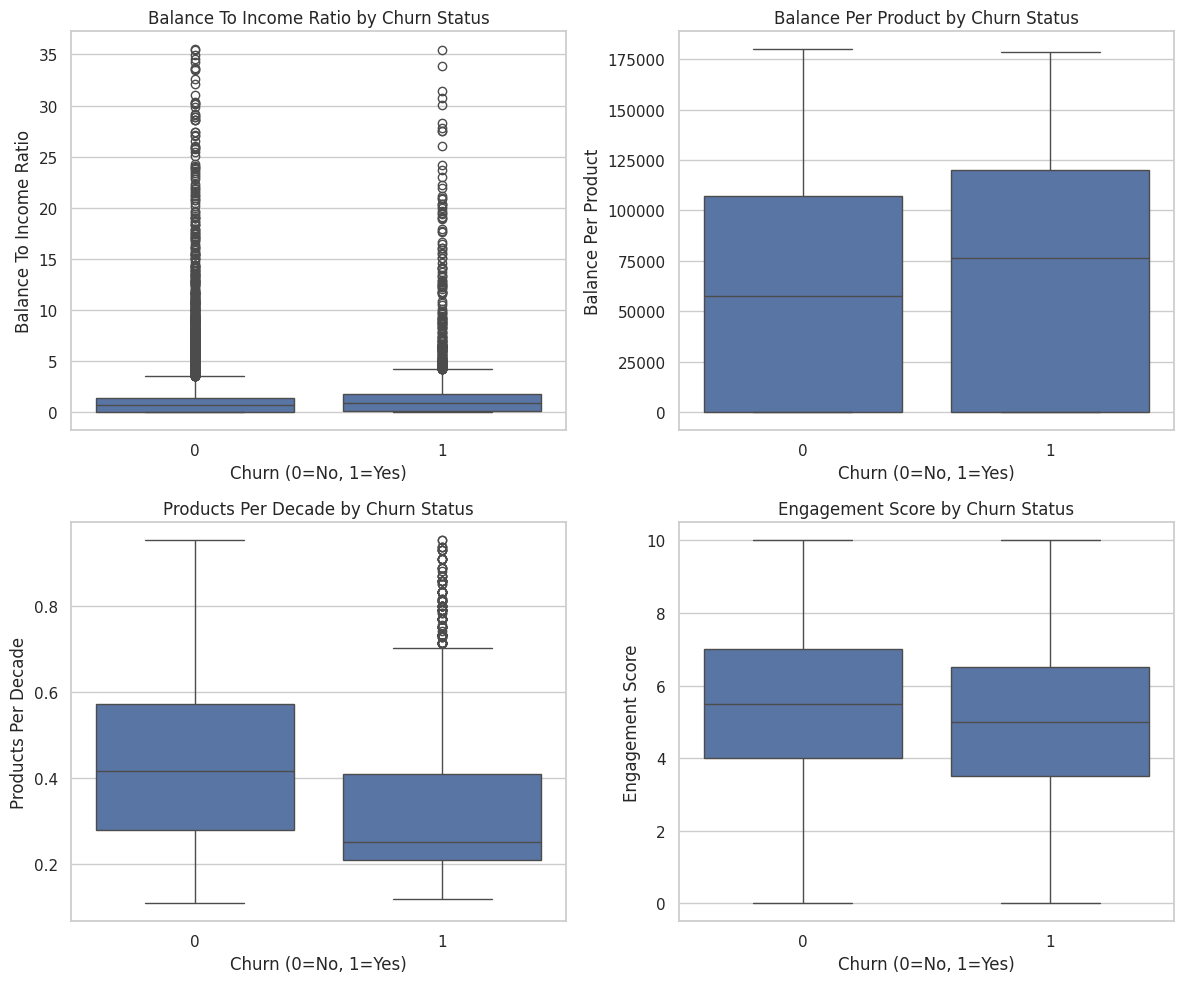

In [41]:
# Create new features
df_features = df.copy()

# Balance-to-Income ratio
df_features['balance_to_income_ratio'] = df_features['balance'] / df_features['estimated_salary']

# Balance per Product
df_features['balance_per_product'] = df_features['balance'] / df_features['products_number']

# Products to Age ratio (products per decade of age)
df_features['products_per_decade'] = df_features['products_number'] / (df_features['age'] / 10)

# Customer Engagement Score (combines active_member, credit_card, and tenure)
df_features['engagement_score'] = (df_features['active_member'] * 3) + (df_features['credit_card'] * 2) + \
                                 (df_features['tenure'] / df_features['tenure'].max() * 5)

# Tratar valores infinitos apenas nas colunas numéricas
numeric_cols = df_features.select_dtypes(include=['float64', 'int64']).columns
df_features[numeric_cols] = df_features[numeric_cols].replace([np.inf, -np.inf], np.nan)
df_features[numeric_cols] = df_features[numeric_cols].fillna(0)

# Explore correlation of new features with churn
new_features = ['balance_to_income_ratio', 'balance_per_product', 'products_per_decade', 'engagement_score']
correlation_with_churn = df_features[new_features + ['churn']].corr()['churn']

print("=== Correlation of New Features with Churn ===\n")
print(correlation_with_churn[correlation_with_churn.index != 'churn'])

# Visualize new feature distributions by churn status
plt.figure(figsize=(12, 10))  # Tamanho reduzido

for i, col in enumerate(new_features):
    plt.subplot(2, 2, i+1)
    
    # Remove outliers for visualization (values beyond 99th percentile)
    cutoff = np.percentile(df_features[col], 99)
    data_to_plot = df_features[df_features[col] <= cutoff]
    
    sns.boxplot(x='churn', y=col, data=data_to_plot)
    plt.title(f'{col.replace("_", " ").title()} by Churn Status')
    plt.xlabel('Churn (0=No, 1=Yes)')
    plt.ylabel(col.replace("_", " ").title())

plt.tight_layout()
plt.show()